<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/07_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.7 Q-Q plot

The Q-Q (quantile-quantile) plot is a graphical method of comparing two probability distributions by plotting their quantiles against each other. We will use statistics library to calculate the quantiles. We will generate three random variable, two having same (normal) distributions, and one having different (uniform) distribution, and will compare their behaviour on the Q-Q plot. 

Below figure shows the Q-Q plot. On the x-axis we have the quantiles for normal distribution, on y-axis we are plotting quantiles of uniform and normal distributions. We see that when the distributions are same, they fall on 1:1 line, otherwise they depart from it.

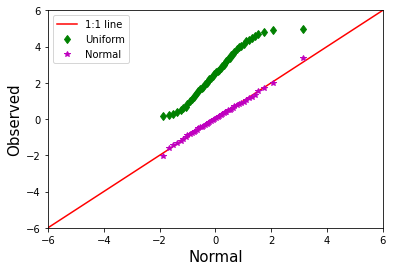

In [7]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

def Q(data):
  ecdf = ECDF(data)
  f = interp1d(ecdf.y, ecdf.x)
  return(f(np.linspace(0,1)))

x = np.random.randn(1000)
y = 5*np.random.rand(1000)
z = np.random.randn(1000)

ecdf = ECDF(x)

Qx = Q(x)
Qy = Q(y)
Qz = Q(z)

plt.plot([-6,6] , [-6,6], 'r', lw=1.5, label='1:1 line')
plt.plot(Qx, Qy, 'gd', label='Uniform')
plt.plot(Qx, Qz, 'm*', label='Normal') 
plt.axis((-6, 6, -6, 6))
plt.legend(loc=2)
plt.xlabel('Normal', fontsize=15)
plt.ylabel('Observed', fontsize=15)
plt.show()